# Even / Odd training
N2N (Noise2Noise) denoising del volumen empiar11415. Utiliza 2 volúmenes $V_1$ y $V_2$, donde $V_1$ es el volumen formado por los slices Z pares "even" y $V_2$ es el volumen formado por los slices Z impares "odd".

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/empiar11415`.

## Creamos $V_1$ y $V_2$

In [1]:
%run even_odd_split.ipynb

noisy.shape=(150, 768, 1024)
Writing /nas/vruiz/cryoCARE/epfl1/even.mrc
noisy[0::2,:,:].shape=(75, 768, 1024)
Writing /nas/vruiz/cryoCARE/epfl1/odd.mrc
noisy[1::2,:,:].shape=(75, 768, 1024)


## Configuramos cryoCARE

In [15]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/train_data_config__evenodd.json
{
    "even": ["even.mrc"],
    "odd": ["odd.mrc"],
    "mask": [""],
    "patch_shape": [16, 16, 16],
    "num_slices": 360,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./even_odd_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/train_data_config__evenodd.json


In [16]:
%%bash
cd /nas/vruiz/cryoCARE/empiar11415
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__evenodd.json

2025-10-04 09:38:23.948219: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(33, 2048, 2660), sample_shape=[16, 16, 16]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 2497.34it/s]


## Entrenamos

In [19]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/train_config__evenodd.json
{
  "train_data": "./even_odd_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [0]
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/train_config__evenodd.json


In [20]:
%%bash
cd /nas/vruiz/cryoCARE/empiar11415
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__evenodd.json

2025-10-04 09:50:28.377445: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-04 09:50:33.619631: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-04 09:50:33.620309: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-04 09:50:33.644926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-04 09:50:33.646976: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-04 09:50:33.647041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 0
GPU 0 successfully found
0 1
1 16
2 16
3 16
4 1
Epoch 1/50


2025-10-04 09:50:37.455259: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-04 09:50:39.154370: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-04 09:50:39.238558: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-04 09:50:40.177475: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-04 09:50:40.777522: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-04 09:50:54.829191: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
20

200/200 [==============================] - 56s 109ms/step - loss: 0.6196 - mse: 0.6196 - mae: 0.6036 - val_loss: 0.6736 - val_mse: 0.6736 - val_mae: 0.5980
Epoch 2/50
200/200 [==============================] - 4s 22ms/step - loss: 0.4591 - mse: 0.4591 - mae: 0.5211 - val_loss: 0.6388 - val_mse: 0.6388 - val_mae: 0.5800
Epoch 3/50
200/200 [==============================] - 5s 23ms/step - loss: 0.4432 - mse: 0.4432 - mae: 0.5125 - val_loss: 0.6420 - val_mse: 0.6420 - val_mae: 0.5779
Epoch 4/50
200/200 [==============================] - 5s 24ms/step - loss: 0.4300 - mse: 0.4300 - mae: 0.5061 - val_loss: 0.6494 - val_mse: 0.6494 - val_mae: 0.5799
Epoch 5/50
200/200 [==============================] - 5s 24ms/step - loss: 0.4347 - mse: 0.4347 - mae: 0.5078 - val_loss: 0.6321 - val_mse: 0.6321 - val_mae: 0.5772
Epoch 6/50
200/200 [==============================] - 4s 22ms/step - loss: 0.4275 - mse: 0.4275 - mae: 0.5052 - val_loss: 0.7464 - val_mse: 0.7464 - val_mae: 0.6077
Epoch 7/50
200/200 

/home/jupyter-vruiz/envs/cryoCARE/lib/python3.8/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /nas/vruiz/cryoCARE/empiar11415/model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))



Loading network weights from 'weights_best.h5'.


## Inferimos

In [29]:
%%writefile /nas/vruiz/cryoCARE/empiar11415/predict_config__evenodd.json
{
    "path": "./model.tar.gz",
    "even": ["empiar11415.mrc"], 
    "odd": ["empiar11415.mrc"],
    "n_tiles": [1,2,2],
    "output": "even_odd_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Overwriting /nas/vruiz/cryoCARE/empiar11415/predict_config__evenodd.json


In [30]:
%%bash
cd /nas/vruiz/cryoCARE/empiar11415
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__evenodd.json || true

/nas/vruiz/cryoCARE/empiar11415


2025-10-04 09:59:34.591437: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-04 09:59:37.345492: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-04 09:59:37.346246: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-04 09:59:37.368612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-04 09:59:37.370633: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-04 09:59:37.370700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(56, 2048, 2664, 1)
Out of memory, retrying with n_tiles = (1, 2, 4, 1)


100%|██████████| 8/8 [00:24<00:00,  3.09s/it]    


['NEWSTACK: Images copied                                  3-Oct-25  17:07:14     '
 'mpleResistance=\r\n\x00Fieldsize=2.072e-005\r\nVerFieldsize=1.38133e-005\r\nAverage=0\r\nIn'
 'egrate=1\r\nFrameTime=51.1672\r\n\r\n[EScan]\r\nScan=\x00\x00\x00\x00\x00\x00\x00\x00OInterna\x00\x00\x00\x00\x00\x00\x00\x00Oe\r\nDwell=5'
 '-007\r\nPixelWidth=6.74479e-009\r\nPixelHeight=6.74479e-009\r\nHorFieldsize=2.072e-005'
 '\nVerFieldsize=1.38133e-005\r\nFrameTime=51.1672\r\nLineTime=0.024984\r\nMainslock=Off\r'
 'LineIntegration=16\r\nScanInterlacing=1\r\n\r\n[Stage]\r\nStageX=0.00371587\r\nStageY=0.00'
 '293\r\nStageZ=0.00403778\r\nStageR=-1.22169\r\nStageT=0.122173\r\nStageTb=0\r\nSpecTilt=\r\n'
 'orkingDistance=0.00403779\r\nActiveStage=Bulk\r\n\r\n[Image]\r\nDigitalContrast=1\r\nDigit'
 'cryoCARE                                                04-Oct-25  10:01:31     '
 '']


In [31]:
import mrcfile
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [32]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [33]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar11415/empiar11415.mrc'
original_volume = read_MRC(mrc_file_path)

In [34]:
original_volume.shape

(59, 2048, 2660)

In [35]:
mrc_file_path = '/nas/vruiz/cryoCARE/empiar11415/even_odd_denoised/empiar11415.mrc'
denoised_volume = read_MRC(mrc_file_path)

In [36]:
denoised_volume.shape

(59, 2048, 2660)

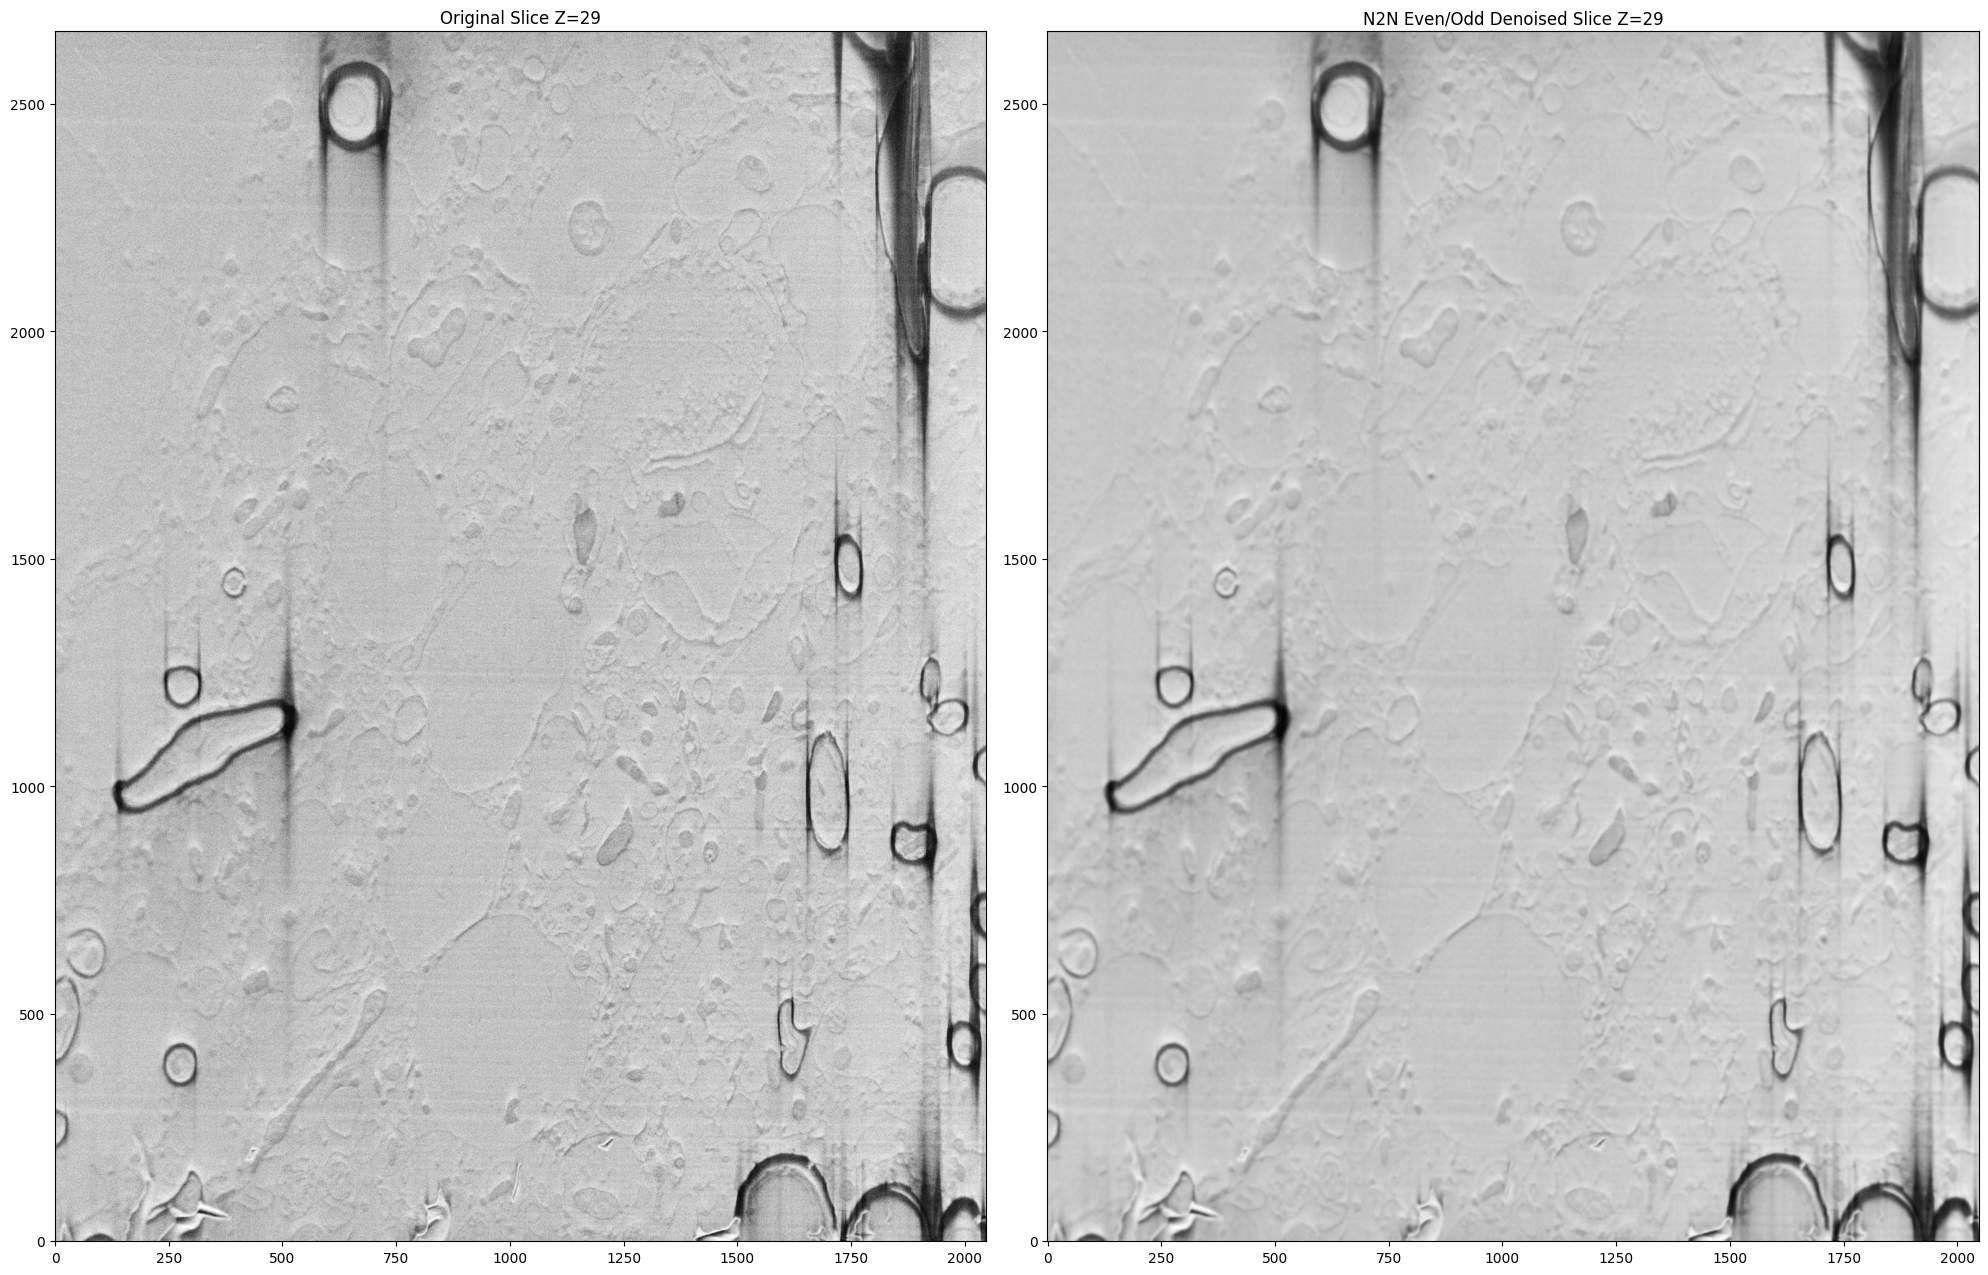

In [37]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Even/Odd Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [3]:
%pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

  Cloning https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to /tmp/pip-install-qunn6n7e/self-fourier-shell-correlation_6137bacb62924b95aea8da9bffb8a83b
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation /tmp/pip-install-qunn6n7e/self-fourier-shell-correlation_6137bacb62924b95aea8da9bffb8a83b
  Resolved https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to commit f785ed2aa883d5362036cc66d26498286c9a48ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for self_fourier_shell_correlation: filename=self_fourier_shell_correlation-0.0.1-py3-none-any.whl size=21626 sha256=385f40481eaa82322cc6f78b9adc8303817d5219ecbb9e2bf7c2b5bf14ab1852
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ynnucda/wheels/0c/c0/88/a3401dd3fbe79196f4fbb82f0eab4016ee5bc623f40ef3b69d
Successfully bu

In [4]:
%pip show self_fourier_shell_correlation

Name: self_fourier_shell_correlation
Version: 0.0.1
Summary: Self Fourier shell correlation (https://www.nature.com/articles/s42003-023-05724-y)
Home-page: https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation
Author: 
Author-email: "Eric J. Verbeke" <ev9102@princeton.edu>, Vicente González Ruiz <vicente.gonzalez.ruiz@gmail.com>
License: 
Location: /nas/vruiz/envs/cryoCARE/lib/python3.8/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
print(sys.executable)

/home/jupyter-vruiz/envs/cryoCARE/bin/python


In [5]:
%pip install "shuffling @ git+https://github.com/vicente-gonzalez-ruiz/shuffling"

  Cloning https://github.com/vicente-gonzalez-ruiz/shuffling to /tmp/pip-install-hvj6fi3o/shuffling_3f860d259c594094b89762fc3575088b
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/shuffling /tmp/pip-install-hvj6fi3o/shuffling_3f860d259c594094b89762fc3575088b
  Resolved https://github.com/vicente-gonzalez-ruiz/shuffling to commit 0710ed80bd40725b8fd116352c8e58a97f96528b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"

  Cloning https://github.com/vicente-gonzalez-ruiz/motion_estimation to /tmp/pip-install-v2hjugss/motion-estimation_9ab642a2ca0e46c992616d48f6a19d9a
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/motion_estimation /tmp/pip-install-v2hjugss/motion-estimation_9ab642a2ca0e46c992616d48f6a19d9a
  Resolved https://github.com/vicente-gonzalez-ruiz/motion_estimation to commit 1f5e6bbf388db38c054f3ae38b4e82f074f7b493
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [1]:
from self_fourier_shell_correlation import fsc_utils as fsc

In [2]:
import mrcfile

In [3]:
import matplotlib.pyplot as plt

In [4]:
even = mrcfile.read("/nas/vruiz/cryoCARE/empiar11415/even.mrc")

In [5]:
odd = mrcfile.read("/nas/vruiz/cryoCARE/empiar11415/odd.mrc")

In [6]:
spatial_freq, fsc_values = fsc.fourier_shell_correlation(even, odd, shell_thickness=0.01)

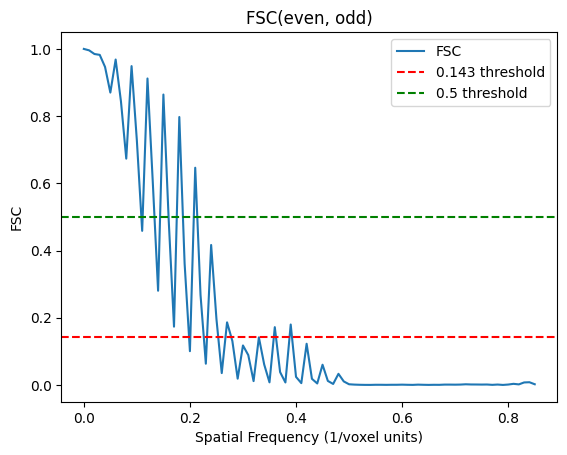

In [7]:
fsc.plot_fsc(spatial_freq, fsc_values, "Spatial Frequency (1/voxel units)", "FSC", "FSC(even, odd)")